### Importing the basic libraries that are used to perform analysis on python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
gold_price_full = pd.read_csv('gold_price_data.csv')
gold_price_full['Date'] = pd.to_datetime(gold_price_full['Date'])

### Lets look at the first few rows of the data

In [3]:
gold_price_full.head()

,Date,Value
0,1992-01-01,353.15
1,1992-02-01,356.40
2,1992-03-01,350.45
3,1992-04-01,344.00
4,1992-05-01,337.50


## `Set the DATE column as the index.`


In [4]:
gold_price_full= gold_price_full.set_index('Date')

In [5]:
gold_price_full.head()

,Value
Date,
1992-01-01,353.15
1992-02-01,356.40
1992-03-01,350.45
1992-04-01,344.00
1992-05-01,337.50


### We will be using data till 2017 to train and forecasting model and will be using the model to forecast the sales for 2018 onwards.

In [6]:
train = gold_price_full.loc[:'2018-01-01',:]
test = gold_price_full.loc['2017-12-01':,:]


In [7]:
train.head()

,Value
Date,
1992-01-01,353.15
1992-02-01,356.40
1992-03-01,350.45
1992-04-01,344.00
1992-05-01,337.50


## Making the time plot of the train dataset to visualise it


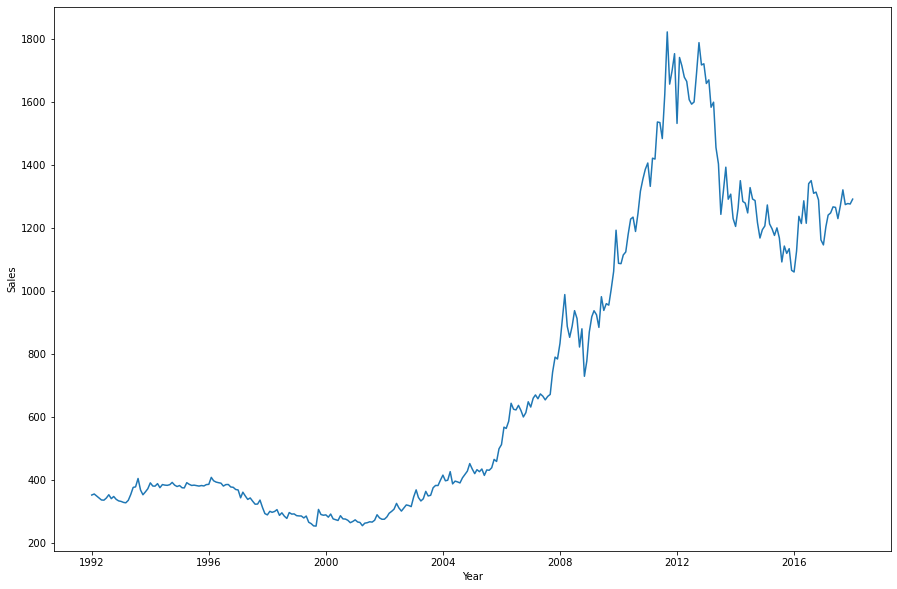

In [8]:
plt.figure(figsize=[15,10])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.plot(train)

## Question - 1: Write your observations about value of gold in detail.

The Plot Seems to be horizontal with irregular pattern cyclic trend from 1992 till 2004, after 2004 the plot seems to show increasing trend with cyclic nature steadily till 2013, afterward the plot declined to some extent with seasonal pattern and again started to show increasing trend after 2016

<b>The Seasonal Variations Increased over time from 2004 till 2013</b>, which is clearly seen on plot

On whole the plot shows a <b> complex pattern with daya to day noises, Increasing Trend, also Cyclic & with some seasonality</b> in it


In [54]:
# Run this cell and don't make any changes
for_sma = train.copy()

First, Let's use a simple forecasting technique. Implementing the simple moving average forecasting model with a rolling window of 12 months

In [55]:
for_sma['SMA_12'] = for_sma['Value'].rolling(window = 12).mean()
for_sma.tail(1)

,Value,SMA_12
Date,,
2017-11-01,1277.05,1241.808333


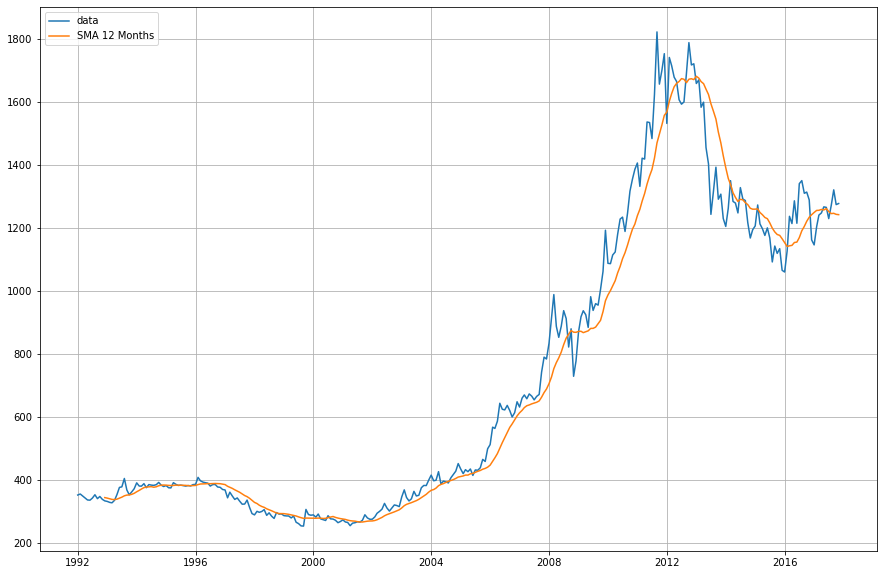

In [56]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(for_sma['Value'],label='data')
plt.plot(for_sma['SMA_12'],label='SMA 12 Months')
plt.legend(loc=2)

## Question - 2: According to the results obtained in the previous question, what can you infer about the results obtained? Is the moving average model working fine? 

Simple moving average weights equally all the data in the series, it is best model for such complex time series pattern.

The Simple moving average actually <b> smoothens the day today noises in the plot</b>
& Filters the random variations

It actually smoothens/takes away the seasonality & Trend can be detected well,

<b> Is the moving average working fine?</b>
Moving average model actually smoothen the model from noises, but non stationary components like trend, cyclic & seasonality features still present in it

From the above plot it is seen the Model is smoothened/filtered out the noises, (orange curve), but the trend pattern still present in it (as we can see, orange SMA curve follows the Original data set Blue curve without peak & trough)

Now lets build an Auto-Regressive models

## Question-3: Before we moving ahead building an Auto Regressive model, we would be required to remove trend and seasonality from the give time series. Answer, why does Trend and seasonality affect Auto regressive models adversely and why is it required to be removed before building a ARIMA model?

Any Time series data, to be usabe it has be removed with all irregularities like trend , seasonality, cyclicity etc, the series should be the stationarity one

<b>Autoregression:</b> Predicts the future event by the past observations , if Seasonality  & trend present in the model , <b>then the mean & variance will vary with the trend/time stamp, which results in error of the forecast</b>
also the prediction would become unreliable
Hence, It is recommended to remove the trend & seasonality components i.e stationary in nature & make the series a predictable one  by converting the statistical components mean & variance of the time series a constant.

Also ARIMA is sensitive to Trends & Seasonality with it, it is recommended to have a predictable set of variation that occur over period time to forecast the future exactly

If Trend is present it is hard to detect

## Lets check the rolling statistics 

In [9]:
train = train.iloc[:-1,:]
from matplotlib.pylab import rcParams
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()   
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

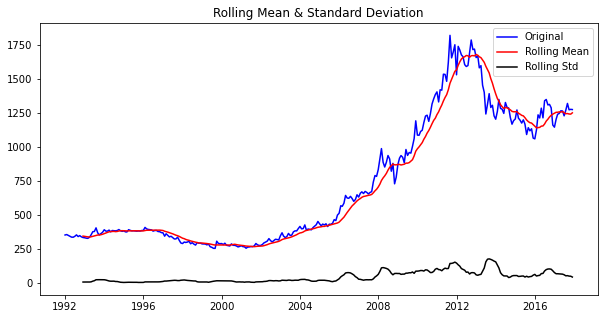

In [10]:
rolling_means(train)

## Question-4: Explain the significance of above step. What can we infre from the above results?

### Significance 
The Blue color represents the original data, Red plot refers to transformed series, which is smoothened from day to day noises & adjusted to remove the seasonality & cyclic components in it
but still there presents a trend (increasing trend) pattern in it as the red colored plot exactly follows the trend of the blue colored origibal plot

Here the <b>The emerging Trend of data has been Captured, soomthening of seasonal variations</b>

### Inference

The plot is smoothened for noises & Irregulaities such as Cyclicity & seasonlity has been removed but still trend component has been captured clearly
<b> The Mean & Variance </b> still <b> vary</b> with the trend or time stamp
The model consists of <b> Non Stationarity Components in it </b>

## Perform ADF test to check the stationarity of the data

In [11]:

def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['Value'], autolag = 'AIC')

    dfoutput  =  round(pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']),4)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [12]:
adf_test(train)

Results of Dickey Fuller Test:
Test Statistic                  -0.627000
p-value                          0.864800
#Lags Used                      11.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


## Question-5: What is the null hypothesis of the ADF test? What can you infer from the results of this test?

### H0 = TS is non-stationary

### Null Hypothesis :  Time series consists of non stationary components i.e the model/series consists of trend, Cyclic & Seasonal components in it

<b>Alternate hyphothesis H1 = TS is Stationary</b> i.e, Trend, Seasonality not present in Time series (Mean & Variance is constant with time)

### Inference:

### P Value is 0.864 
As per rule of thumb If P Value is Low Ho should go, <b>here P value Greater than alpha 0.05</b> hence We need to Accept the Ho <b>
  
We need to accept the Null hyphothesis</b>
Therefore the above model consists of non stationary components in it
### Test statistics : 
Also The Test statistics is not similar to critical Values, it should be less than critical values,but here <b>Test statistics is greater than Critical Values,</b> Hence we need to accept the null.

# Log Transformation and Differencing

Here we will remove the trend and seasonality from our data.

In [13]:
log_trans = np.log(train['Value'])

In [14]:
diff_data = pd.DataFrame(log_trans - log_trans.shift()).dropna()

## Question-6: Previously we have created a functions for plotting rolling mean and standard deviation. Use the same function and check the plot of `diff_data`

In [15]:
# Write your code here.
train = train.iloc[:-1,:]
from matplotlib.pylab import rcParams
def rolling_means(diff_data):
    rolmean  =  diff_data.rolling(window = 12).mean()   
    rolstd  =  diff_data.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(diff_data, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

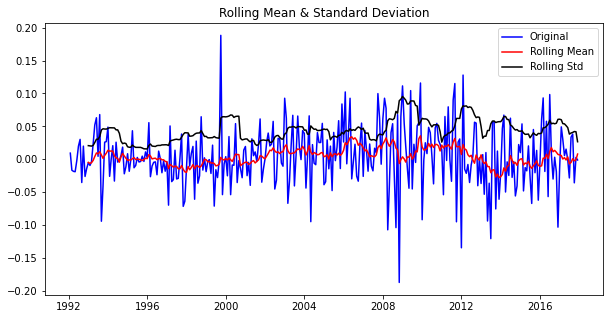

In [16]:
rolling_means(diff_data)

### Inference
The Mean & Variance (Red & black) variations looks predictable over thime, 
the Increasing Linear trend component whcih was present earlier has been removed
Still few Outliers Peak points ar epresent in the data set which is due to the external influences of sales/prices

## Question-7: Previously we have created a functions for perfroming adf_test. Use the same function and check the adf_test results for `diff_data`

In [17]:
# Write your code here.
def adf_test(diff_data):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(diff_data['Value'], autolag = 'AIC')

    dfoutput  =  round(pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']),4)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [18]:
adf_test(diff_data)

Results of Dickey Fuller Test:
Test Statistic                 -20.032200
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64


## Question-8: Is the data stationary now? Explain the results here

### Yes the Data is  Stationary after the Differencing transformation

For a Time series to be __stationary__, its ADF test should have:
1. __low p-value__ (according to the null hypothesis)
2. __Critical values__ at 1%, 5%, 10% confidence intervals should be as __close__ as possible __to__ the __Test Statistics__

### Explanation:
### Ho = TS is Non Stationary (Time Seies consists of Trend,Seasonality & Cyclic patterns in it i.e Mean & variance vary with Time)
### H1 = TS is Stationary (Mean & Varianc eis constant No Trend, Seasonality)

The ADF Test Results conveys,
### P Value as 0 which was reduced from 0.864 previously
Now the P value is lesser than Alpha 0.05 , hence <b> Reject the Null hyphothesis</b>
Also
### Test Statistics is very less than critical values (1%,5%,10%)
<b>-20 less than -2.5, 2.8, 3.4 </b>

Hence We can <b> Reject Null Hyphothesis & accept the Alternate Hyphothesis</b>
    The Transformed Time series is Stationary Now .
    

## Now, before performing time series forecasting lets plot the acf and pacf

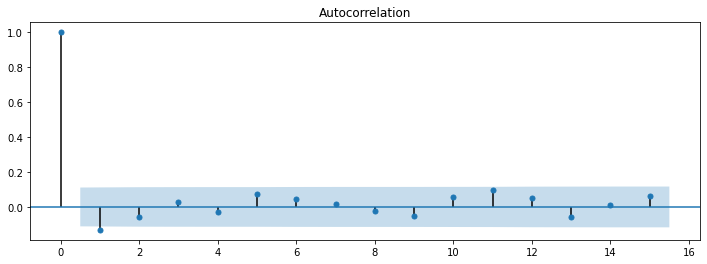

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

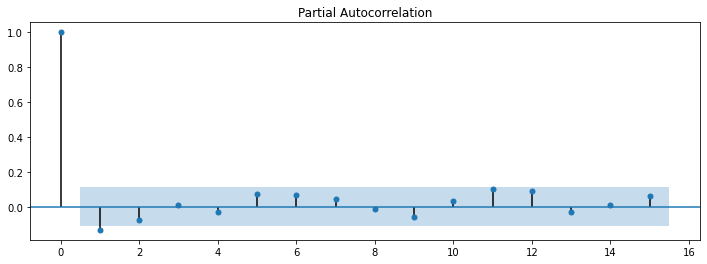

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

## Question-9: What can you infer from the above plots?

### Auto Correlation plot of the diff Data model:
<b> The Lag 1 crosses the region of significance (blue region)</b>
### Partially Auto Correlation Plot
<b> The Lag 11 exactly crotouches /meets to cross the region the significance</b>(blue region)
    also lag 1 crosses , but lag 11 maximum lag is choosen.

### Performing log transformation and differencing on the test dataset

In [21]:
log_test = np.log(test)
diff_test = pd.DataFrame(log_test - log_test.shift()).dropna()

Now let's build an AR Model using the differenced data

In [22]:
from statsmodels.tsa.ar_model import AR
model = AR(diff_data)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

C:\Users\RAMPRASAD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Lag: 16
Coefficients: const        0.003506
L1.Value    -0.160056
L2.Value    -0.073148
L3.Value     0.021695
L4.Value    -0.021173
L5.Value     0.067285
L6.Value     0.061777
L7.Value     0.035910
L8.Value    -0.019759
L9.Value    -0.054927
L10.Value    0.044430
L11.Value    0.108326
L12.Value    0.084348
L13.Value   -0.022856
L14.Value    0.023745
L15.Value    0.068586
L16.Value    0.040176
dtype: float64


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [23]:
predictions = model_fit.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions.head()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], diff_test.iloc[i]))
    

predicted=0.008142, expected=0.012079
predicted=0.010217, expected=0.038259
predicted=-0.002541, expected=-0.025368
predicted=0.001040, expected=0.012236
predicted=0.003064, expected=-0.012733
predicted=0.003953, expected=-0.009609
predicted=0.010678, expected=-0.036820
predicted=0.009425, expected=-0.023351
predicted=-0.000055, expected=-0.015668
predicted=-0.002392, expected=-0.008956
predicted=0.007175, expected=0.034542
predicted=0.007800, expected=-0.000691


Plotting AR model


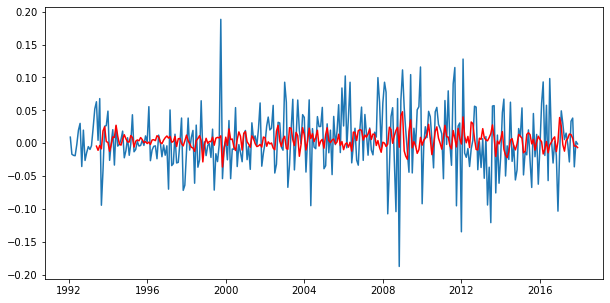

In [61]:
plt.plot(diff_data)
plt.plot(model_fit.fittedvalues, color = 'red')
print('Plotting AR model')

## Plotting the AR MODEL 

Plotting AR model


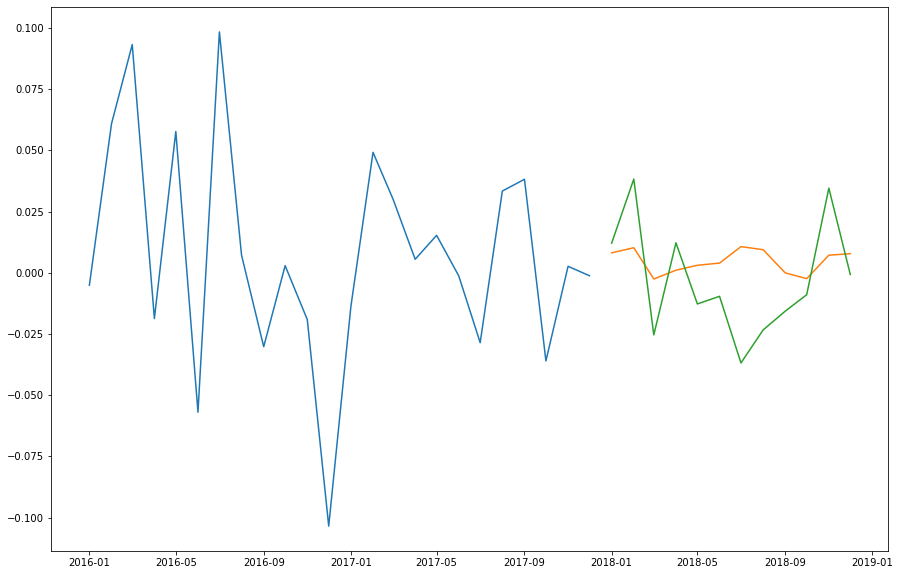

In [24]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions)
plt.plot(diff_test)
print('Plotting AR model')

In [25]:
diff_test = diff_test['Value']

## Evaluate the accuracy of the model using metrics such as MSE and MAPE

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(predictions, diff_test)

2773.8923647689126

In [27]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Now let's build a MA Mode using the differenced data: Use order = (0,0,1)

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diff_data,order=(0,0,1))
results_MA = model.fit()
print('Lag: %s' % results_MA.k_ar)
print('Coefficients: %s' % results_MA.params)

C:\Users\RAMPRASAD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Lag: 0
Coefficients: const          0.004132
ma.L1.Value   -0.149248
dtype: float64


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [29]:
predictions_ma = results_MA.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_ma.head()

for i in range(len(predictions_ma)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], diff_test.iloc[i]))

predicted=0.005078, expected=0.012079
predicted=0.004132, expected=0.038259
predicted=0.004132, expected=-0.025368
predicted=0.004132, expected=0.012236
predicted=0.004132, expected=-0.012733
predicted=0.004132, expected=-0.009609
predicted=0.004132, expected=-0.036820
predicted=0.004132, expected=-0.023351
predicted=0.004132, expected=-0.015668
predicted=0.004132, expected=-0.008956
predicted=0.004132, expected=0.034542
predicted=0.004132, expected=-0.000691


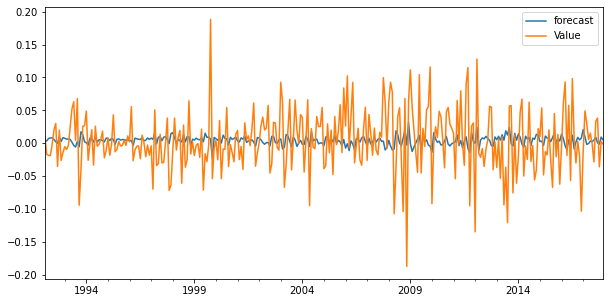

In [64]:
fitted_values = results_MA.plot_predict()

## Plotting the MA Model

Plotting MA model


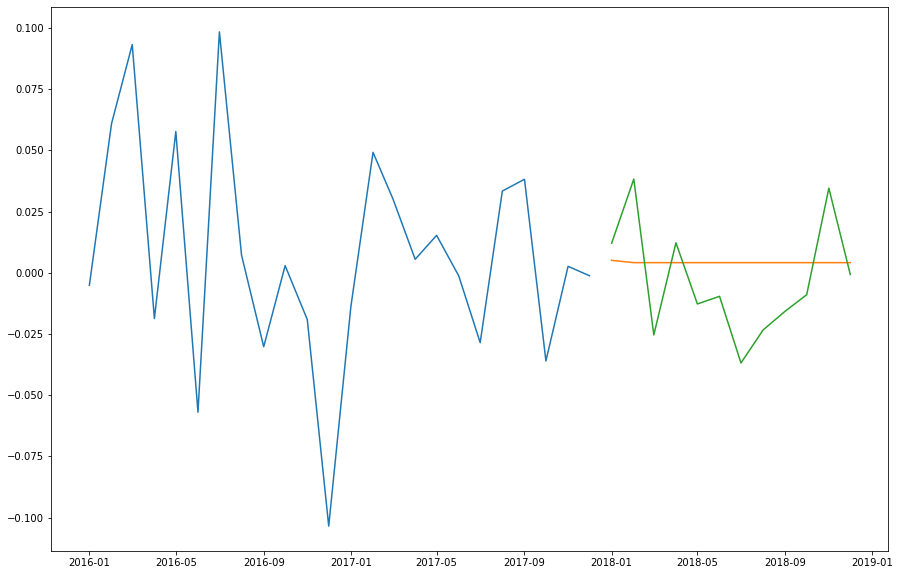

In [30]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_ma)
plt.plot(diff_test)
print('Plotting MA model')

## Evaluate the accuracy of the MA model using metrics such as MSE and MAPE

In [31]:
mean_absolute_percentage_error(predictions_ma, diff_test)

493.3204762026036

In [32]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_ma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Using the value p as 11 and q as 2, building a ARMA model.

In [45]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(diff_data,order=(11,2))
model_arma = model.fit(transparams=False)
print('Lag: %s' % model_arma.k_ar)
print('Coefficients: %s' % model_arma.params)

C:\Users\RAMPRASAD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Lag: 11
Coefficients: const           0.003855
ar.L1.Value     0.514711
ar.L2.Value     0.187043
ar.L3.Value     0.092763
ar.L4.Value    -0.013611
ar.L5.Value     0.078563
ar.L6.Value     0.013561
ar.L7.Value    -0.022245
ar.L8.Value    -0.056336
ar.L9.Value    -0.036638
ar.L10.Value    0.077501
ar.L11.Value    0.067173
ma.L1.Value    -0.678873
ma.L2.Value    -0.166720
dtype: float64


## Making predictions using ARMA model

In [46]:
predictions_arma = model_arma.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_arma.head()

for i in range(len(predictions_arma)):
    print('predicted=%f, expected=%f' % (predictions_arma[i], diff_test.iloc[i]))

predicted=0.001233, expected=0.012079
predicted=0.007336, expected=0.038259
predicted=0.004389, expected=-0.025368
predicted=0.003102, expected=0.012236
predicted=-0.001472, expected=-0.012733
predicted=0.001826, expected=-0.009609
predicted=0.008259, expected=-0.036820
predicted=0.004952, expected=-0.023351
predicted=0.002559, expected=-0.015668
predicted=0.002813, expected=-0.008956
predicted=0.002202, expected=0.034542
predicted=0.003228, expected=-0.000691


Plotting ARMA model


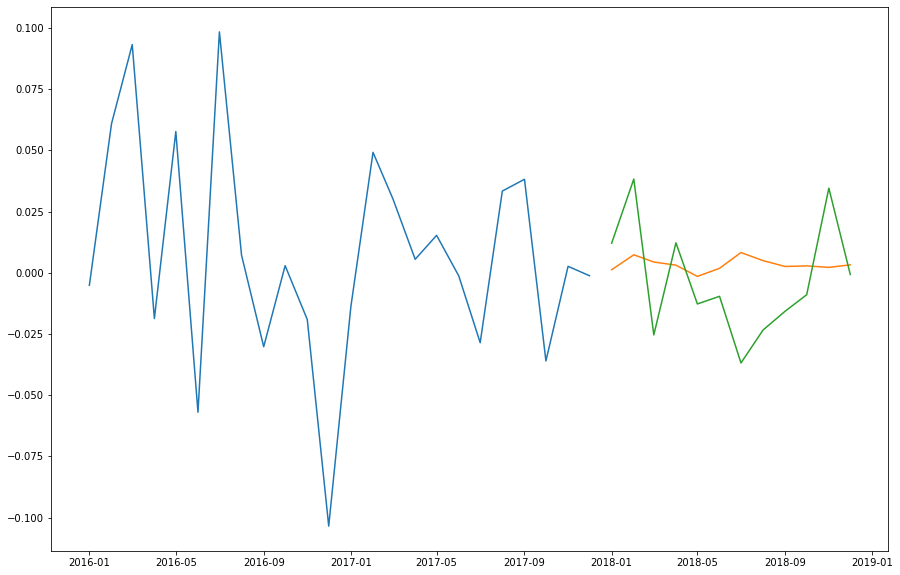

In [47]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_arma)
plt.plot(diff_test)
print('Plotting ARMA model')

## Evaluate the accuracy of the ARMA model using metrics such as MSE and MAPE`

In [48]:
mean_absolute_percentage_error(predictions_arma, diff_test)

625.2959731550726

In [37]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_arma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


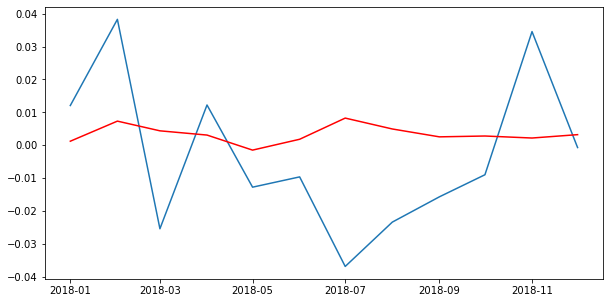

In [63]:
pyplot.plot(diff_test)
pyplot.plot(predictions_arma, color='red')
pyplot.show()

## Question-10: Compare AR,MA and ARMA models using the evaluation metrics and decide the best performing model.

### Mean Square error of all the 3 AR MA & ARMA model is 0.001
### MAPE for AR - 2773
### MAPE for MA - 493
### MAPE for ARMA - 625.29

From the Values we can tell the bad model is AR model
Better one is MA 

### Model Comparison <a name = "Model Comparison"></a>
AR - MAE(0.001) & MAPE(2773), MA - MAE(0.001) & MAPE(493), ARMA - MAE(0.001) & MAPE(625.29)


### MA & ARMA could perform better